In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/_data.csv")
print(df.columns.tolist())

['Unnamed: 0', 'ID  объявления', 'Количество комнат', 'Тип', 'Метро', 'Адрес', 'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Телефоны', 'Описание', 'Ремонт', 'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел', 'Можно с детьми/животными', 'Дополнительно', 'Название ЖК', 'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод', 'Ссылка на объявление']


In [153]:
columns_to_drop = [
    "Unnamed: 0",
    "Телефоны",
    "Описание",
    "Название ЖК",
    "Ссылка на объявление",
    "Тип",
    "Площадь комнат, м2",
]

df = df.drop(columns=columns_to_drop)
df.to_csv("../data/data.csv", index=False)
df = pd.read_csv("../data/data.csv")

In [154]:
df.head(2)

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Серия дома,"Высота потолков, м",Лифт,Мусоропровод
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.0,"Пасс (4), Груз (1)",Да
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.5,"Пасс (1), Груз (1)",Нет


In [155]:
df["Площадь, м2"] = (
    df["Площадь, м2"]
    .astype(str)
    .str.replace(",", ".")
    .str.split("/")
    .str[0]
    .astype(float)
)
df.head(2)

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Серия дома,"Высота потолков, м",Лифт,Мусоропровод
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.0,"Пасс (4), Груз (1)",Да
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.5,"Пасс (1), Груз (1)",Нет


In [156]:
df["Цена"] = (
    df["Цена"].astype(str).str.replace(",", ".").str.split(".").str[0].astype(int)
)
df.head(2)

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Серия дома,"Высота потолков, м",Лифт,Мусоропровод
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,"5/16, Монолитный",подземная,500000,Дизайнерский,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.0,"Пасс (4), Груз (1)",Да
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0,"5/16, Монолитно-кирпичный",подземная,500000,Дизайнерский,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.5,"Пасс (1), Груз (1)",Нет


In [157]:
df["floor"] = df["Дом"].astype(str).str.split("/").str[0].astype(int)
df.head(2)

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,floor
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,"5/16, Монолитный",подземная,500000,Дизайнерский,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.0,"Пасс (4), Груз (1)",Да,5
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0,"5/16, Монолитно-кирпичный",подземная,500000,Дизайнерский,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.5,"Пасс (1), Груз (1)",Нет,5


In [158]:
df["house_type"] = df["Дом"].astype(str).str.split(",").str[-1].astype(str)
df.head(2)

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,floor,house_type
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,"5/16, Монолитный",подземная,500000,Дизайнерский,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.0,"Пасс (4), Груз (1)",Да,5,Монолитный
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0,"5/16, Монолитно-кирпичный",подземная,500000,Дизайнерский,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.5,"Пасс (1), Груз (1)",Нет,5,Монолитно-кирпичный


In [159]:
df.drop(columns=["Дом"], inplace=True)
df.head(5)

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,floor,house_type
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Дизайнерский,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.0,"Пасс (4), Груз (1)",Да,5,Монолитный
1,271634126,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0,подземная,500000,Дизайнерский,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.5,"Пасс (1), Груз (1)",Нет,5,Монолитно-кирпичный
2,271173086,"4, Оба варианта",м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Евроремонт,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.2,Пасс (1),NaN,5,5/16
3,272197456,"4, Оба варианта",м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0,подземная,400000,Евроремонт,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.2,Пасс (1),NaN,5,5/6
4,273614615,2,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0,NaN,225000,Евроремонт,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,3.9,"Пасс (1), Груз (1)",Да,12,Панельный


In [160]:
df["house_type"] = df["house_type"].apply(
    lambda x: np.nan if x.replace("/", "").isdigit() else x
)

In [161]:
df["rooms"] = pd.to_numeric(df["Количество комнат"], errors="coerce")

In [162]:
df.sample()

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,floor,house_type,rooms
896,260056056,1,м. Ладожская (15 мин на машине),"Санкт-Петербург, проспект Наставников, 26К2",32.0,наземная,22000,Евроремонт,NaN,Во двор,Раздельный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,Пасс (1),Да,1,Панельный,1.0


In [163]:
def to_meters(i):
    if i > 100:
        return i / 100
    elif i > 20:
        return i / 10
    else:
        return i


df["ceiling_high"] = df["Высота потолков, м"].apply(to_meters)

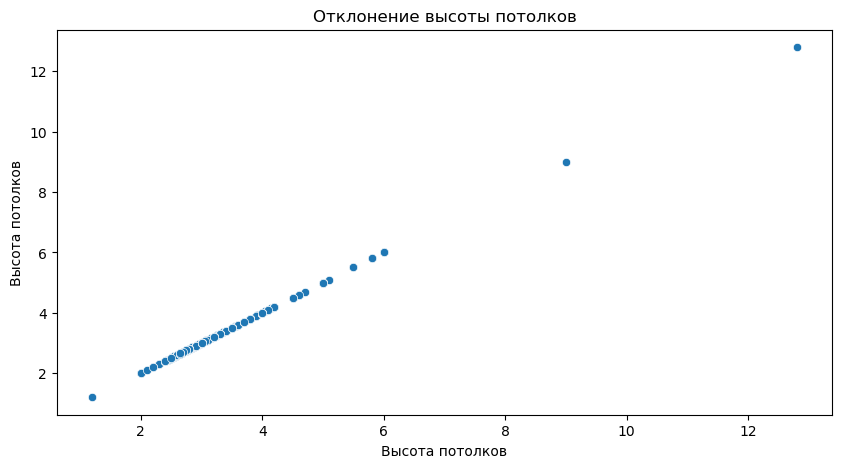

In [164]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="ceiling_high", y="ceiling_high", data=df)
plt.title("Отклонение высоты потолков")
plt.xlabel("Высота потолков")
plt.ylabel("Высота потолков")
plt.show()

In [165]:
num_cols = df.select_dtypes(include=[int, float]).columns.tolist()
cat_cols = df.select_dtypes(include=["category", "object"]).columns.tolist()

for c in num_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    if df[c].isna().any():
        df[c] = (
            df[c]
            .astype("object")
            .fillna("unknown")
            .astype("category" if str(df[c].dtype) == "category" else "object")
        )

In [166]:
df.isna().sum()

ID  объявления              0
Количество комнат           0
Метро                       0
Адрес                       0
Площадь, м2                 0
Парковка                    0
Цена                        0
Ремонт                      0
Балкон                      0
Окна                        0
Санузел                     0
Можно с детьми/животными    0
Дополнительно               0
Серия дома                  0
Высота потолков, м          0
Лифт                        0
Мусоропровод                0
floor                       0
house_type                  0
rooms                       0
ceiling_high                0
dtype: int64

In [167]:
df.head(1)

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,floor,house_type,rooms,ceiling_high
0,271271157,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Дизайнерский,unknown,unknown,unknown,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",unknown,3.0,"Пасс (4), Груз (1)",Да,5,Монолитный,4.0,3.0


In [168]:
columns_to_drop = [
    "Количество комнат",
    "Высота потолков, м",
    "Серия дома",
    "Дополнительно"
]

df = df.drop(columns=columns_to_drop)

In [169]:
df.head(1)

,ID объявления,Метро,Адрес,"Площадь, м2",Парковка,Цена,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Лифт,Мусоропровод,floor,house_type,rooms,ceiling_high
0,271271157,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Дизайнерский,unknown,unknown,unknown,"Можно с детьми, Можно с животными","Пасс (4), Груз (1)",Да,5,Монолитный,4.0,3.0


In [170]:
translation_dict = {
    'Метро': 'metro',
    'Адрес': 'address',
    'Площадь, м2': 'area_m2',
    'Парковка': 'parking',
    'Цена': 'price',
    'Ремонт': 'renovation',
    'Балкон': 'balcony',
    'Окна': 'windows',
    'Санузел': 'bathroom',
    'Можно с детьми/животными': 'kids_pets_allowed',
    'Лифт': 'elevator',
    'Мусоропровод': 'garbage_chute'
}
df.rename(columns=translation_dict, inplace=True)


In [171]:
df.head(1)

,ID объявления,metro,address,area_m2,parking,price,renovation,balcony,windows,bathroom,kids_pets_allowed,elevator,garbage_chute,floor,house_type,rooms,ceiling_high
0,271271157,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0,подземная,500000,Дизайнерский,unknown,unknown,unknown,"Можно с детьми, Можно с животными","Пасс (4), Груз (1)",Да,5,Монолитный,4.0,3.0
